In [ ]:
#CIFAR10 dataset

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from numpy import array
#importing CIFAR10 dataset from keras
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [18]:
#loading CIFAR10 dataset and splitting it into training and validation set
#50000 training images and 10000 test images
(X_train_f, y_train_f), (X_test, y_test) = cifar10.load_data()
print(len(X_train_f))
print(len(X_test))
type(X_train_f)
#X, y = cifar10.load_data()
#print(len(X))
#print(len(y))

50000
10000


numpy.ndarray

In [19]:
#train validation split function
def train_valid_split(X,y):
    ind = np.arange(0,len(X_train_f),1)
    np.random.shuffle(ind)
    X_train=X_train_f[ind[0:40000]]
    X_valid=X_train_f[ind[40000:50000]]
    y_train=y_train_f[ind[0:40000]]
    y_valid=y_train_f[ind[40000:50000]]
    return X_train, X_valid, y_train, y_valid
#len(y_train)
X_train, X_valid, y_train, y_valid = train_valid_split(X_train_f, y_train_f)
print(y_train.shape)
print(y_train)
print(y_valid.shape)
print(y_train)

(40000, 1)
[[7]
 [4]
 [8]
 ...
 [4]
 [8]
 [8]]
(10000, 1)
[[7]
 [4]
 [8]
 ...
 [4]
 [8]
 [8]]


In [20]:
#j=0
#s_X_train=np.empty_like(X_train)
#s_y_train=np.empty_like(y_train)
#for i in range(0, len(X_train)):
#    if (y_train[i]==0 or y_train[i]==1 or y_train[i]==2):
#        s_X_train[j]=X_train[i]
#        s_y_train[j]=y_train[i]
#        j=j+1
#print(j)
#print(s_y_train)
#print(s_X_train)


In [21]:
#create subset of first 3 classes i.e. airplane, automobile and bird
s_X_train = X_train[np.isin(y_train, [0,1,2]).flatten()]
s_y_train = y_train[np.isin(y_train, [0,1,2]).flatten()]
s_X_valid = X_valid[np.isin(y_valid, [0,1,2]).flatten()]
s_y_valid = y_valid[np.isin(y_valid, [0,1,2]).flatten()]
s_X_test = X_test[np.isin(y_test, [0,1,2]).flatten()]
s_y_test = y_test[np.isin(y_test, [0,1,2]).flatten()]
#print(subset_y_train)
print(s_X_train.shape)
print(s_y_train.shape)
print(s_X_valid.shape)
print(s_y_valid.shape)
print(s_X_test.shape)
print(s_y_test.shape)

(11981, 32, 32, 3)
(11981, 1)
(3019, 32, 32, 3)
(3019, 1)
(3000, 32, 32, 3)
(3000, 1)


In [22]:
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#class_names = ['airplane', 'automobile', 'bird'] 

In [23]:
#Vectorize the images and encode the known class labels using categorical encoding.
#no_label_classes = 3
y_train = to_categorical(s_y_train, 3)
y_valid = to_categorical(s_y_valid, 3)
y_test = to_categorical(s_y_test, 3)

#normalizing the training/validation and testing dataset to obtain a mean close to 0 and obtain faster convergence
X_train = s_X_train.astype('float32')/255
X_valid = s_X_valid.astype('float32')/255
X_test = s_X_test.astype('float32')/255
print(X_train[1].ndim)
print(X_train[1])

3
[[[0.77254903 0.7529412  0.67058825]
  [0.73333335 0.69411767 0.6039216 ]
  [0.67058825 0.61960787 0.5176471 ]
  ...
  [0.6862745  0.627451   0.5137255 ]
  [0.6862745  0.654902   0.5568628 ]
  [0.91764706 0.8666667  0.827451  ]]

 [[0.7137255  0.7019608  0.6431373 ]
  [0.78431374 0.75686276 0.6862745 ]
  [0.7254902  0.6862745  0.59607846]
  ...
  [0.6117647  0.56078434 0.48235294]
  [0.63529414 0.57254905 0.47843137]
  [0.9098039  0.8627451  0.8       ]]

 [[0.70980394 0.7019608  0.6627451 ]
  [0.8235294  0.8039216  0.74509805]
  [0.76862746 0.73333335 0.64705884]
  ...
  [0.5647059  0.49411765 0.44705883]
  [0.65882355 0.52156866 0.4392157 ]
  [0.92156863 0.83137256 0.7607843 ]]

 ...

 [[0.9137255  0.89411765 0.87058824]
  [0.9019608  0.88235295 0.85882354]
  [0.90588236 0.8862745  0.8627451 ]
  ...
  [0.9490196  0.9254902  0.9098039 ]
  [0.9490196  0.9254902  0.90588236]
  [0.972549   0.9529412  0.9254902 ]]

 [[0.9137255  0.89411765 0.87058824]
  [0.89411765 0.8745098  0.8509804 

In [24]:
#load keras libraries for using sequential model and layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD

nn_model = Sequential()
#nn_model.add(Dense(256, activation = 'relu', input_dim=X_train.shape[1]))
nn_model.add(Flatten(input_shape=X_train.shape[1:]))
nn_model.add(Dense(512, activation = 'relu'))
nn_model.add(Dense(256, activation = 'relu'))
#nn_model.add(Dense(5, activation = 'relu'))
#nn_model.add(Dense(5, activation = 'relu'))
nn_model.add(Dense(3, activation = 'softmax'))

#using SGD for optimization
stoc_grad_desc = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
#using crossentropy as loss function for the model
nn_model.compile(loss='categorical_crossentropy', optimizer=stoc_grad_desc, metrics=['accuracy'])
             

In [25]:
training_hist = nn_model.fit(X_train, y_train, batch_size=100, epochs = 50,  verbose=2, validation_data=(X_valid, y_valid))

Train on 11981 samples, validate on 3019 samples
Epoch 1/50
 - 2s - loss: 0.8749 - acc: 0.6323 - val_loss: 0.7730 - val_acc: 0.6933
Epoch 2/50
 - 2s - loss: 0.7453 - acc: 0.7002 - val_loss: 0.7375 - val_acc: 0.6933
Epoch 3/50
 - 2s - loss: 0.7067 - acc: 0.7178 - val_loss: 0.7125 - val_acc: 0.7079
Epoch 4/50
 - 2s - loss: 0.6796 - acc: 0.7238 - val_loss: 0.6762 - val_acc: 0.7247
Epoch 5/50
 - 2s - loss: 0.6589 - acc: 0.7341 - val_loss: 0.6618 - val_acc: 0.7396
Epoch 6/50
 - 2s - loss: 0.6389 - acc: 0.7453 - val_loss: 0.6564 - val_acc: 0.7410
Epoch 7/50
 - 2s - loss: 0.6218 - acc: 0.7511 - val_loss: 0.6337 - val_acc: 0.7443
Epoch 8/50
 - 2s - loss: 0.6062 - acc: 0.7590 - val_loss: 0.6322 - val_acc: 0.7403
Epoch 9/50
 - 2s - loss: 0.5918 - acc: 0.7633 - val_loss: 0.6141 - val_acc: 0.7565
Epoch 10/50
 - 2s - loss: 0.5768 - acc: 0.7719 - val_loss: 0.6126 - val_acc: 0.7539
Epoch 11/50
 - 2s - loss: 0.5664 - acc: 0.7752 - val_loss: 0.5992 - val_acc: 0.7655
Epoch 12/50
 - 2s - loss: 0.5541 - a

Text(0, 0.5, 'loss')

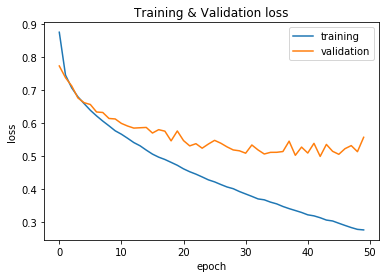

In [26]:
import matplotlib.pyplot as plt
#Plot training and validation loss
plt.plot(training_hist.history['loss'])
plt.plot(training_hist.history['val_loss'])
plt.title('Training & Validation loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

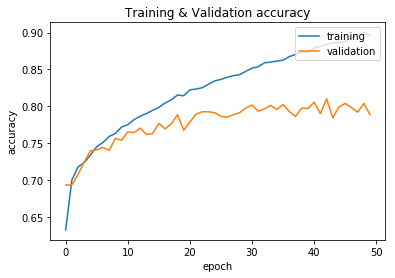

In [27]:
#plot training and validation accuracy
plt.plot(training_hist.history['acc'])
plt.plot(training_hist.history['val_acc'])
plt.title('Training & Validation accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [28]:
loss_accuracy_score = nn_model.evaluate(X_test, y_test)#, batch_size=100, verbose=2)
print("Loss ", loss_accuracy_score[0] )
print("Accuracy score:",loss_accuracy_score[1])

3000/3000 [==============================] - 0s 116us/step
Loss  0.5120449511210123
Accuracy score: 0.8059999998410543


In [29]:
#Retrain the final model and test performance on the test collection. 
testing_hist = nn_model.fit(X_test, y_test, batch_size=100, epochs = 50,  verbose=2, validation_data=(X_valid, y_valid))

Train on 3000 samples, validate on 3019 samples
Epoch 1/50
 - 1s - loss: 0.4957 - acc: 0.8090 - val_loss: 0.5020 - val_acc: 0.8009
Epoch 2/50
 - 1s - loss: 0.4422 - acc: 0.8207 - val_loss: 0.4987 - val_acc: 0.7966
Epoch 3/50
 - 1s - loss: 0.4043 - acc: 0.8450 - val_loss: 0.4996 - val_acc: 0.7999
Epoch 4/50
 - 1s - loss: 0.3949 - acc: 0.8387 - val_loss: 0.5083 - val_acc: 0.7913
Epoch 5/50
 - 1s - loss: 0.3795 - acc: 0.8560 - val_loss: 0.4869 - val_acc: 0.8039
Epoch 6/50
 - 1s - loss: 0.3594 - acc: 0.8627 - val_loss: 0.5011 - val_acc: 0.8032
Epoch 7/50
 - 1s - loss: 0.3480 - acc: 0.8603 - val_loss: 0.4855 - val_acc: 0.8066
Epoch 8/50
 - 1s - loss: 0.3375 - acc: 0.8713 - val_loss: 0.4857 - val_acc: 0.8105
Epoch 9/50
 - 1s - loss: 0.3233 - acc: 0.8757 - val_loss: 0.5732 - val_acc: 0.7840
Epoch 10/50
 - 1s - loss: 0.3160 - acc: 0.8837 - val_loss: 0.4843 - val_acc: 0.8092
Epoch 11/50
 - 1s - loss: 0.3017 - acc: 0.8880 - val_loss: 0.5133 - val_acc: 0.7960
Epoch 12/50
 - 1s - loss: 0.2935 - ac

In [30]:
#Checking the performance of the model after training it with test data
loss_accuracy_score = nn_model.evaluate(X_test, y_test)#, batch_size=100, verbose=2)
print("Loss ", loss_accuracy_score[0] )
print("Accuracy score:",loss_accuracy_score[1])

3000/3000 [==============================] - 0s 112us/step
Loss  0.11327598464488983
Accuracy score: 0.9750000001589457


In [77]:
#save the model 
nn_model.save("My_fully_connected_nn")
nn_model.save_weights("Model_weights.h5")
load_nn_model = nn_model.load_weights("Model_weights.h5")
#new_model=load_model("My_fully_connected_nn")